# Where is the next power outage?

**Name(s)**: Eric Sun & Sunan Xu

**Website Link**: https://ericsun153.github.io/Where_is_the_next_Outage/

# Code

In [28]:
import pandas as pd
import numpy as np
import os

import plotly.express as px
pd.options.plotting.backend = 'plotly'

import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.model_selection import train_test_split

## Framing the Problem

In [29]:
# Data Cleaning
xlsx_file = 'data/outage.xlsx'
csv_file = 'data/outage.csv'

df = pd.read_excel(xlsx_file)

# Write the DataFrame to a CSV file
df.to_csv(csv_file, index=False)
df = pd.read_csv('data/outage.csv')
df

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743


In [30]:
rows_to_skip = list(range(5))
df = pd.read_csv('data/outage.csv', skiprows=rows_to_skip, index_col='OBS')

# Combine the units line and column names, drop unecessary rows and columns
column = np.array(df.columns).astype('str')
unites = np.array(df.iloc[0].fillna('')).astype('str')
unites = ["(" + i + ")" for i in unites]
for i in range(len(unites)):
    if unites[i] == '()':
        unites[i] = ''
combined_column = np.core.defchararray.add(column, unites)
df.columns = combined_column
df = df.reset_index().drop(0).drop('variables(Units)', axis=1).reset_index(drop=True)
df

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL(numeric),CLIMATE.CATEGORY,"OUTAGE.START.DATE(Day of the week, Month Day, Year)",...,POPPCT_URBAN(%),POPPCT_UC(%),POPDEN_URBAN(persons per square mile),POPDEN_UC(persons per square mile),POPDEN_RURAL(persons per square mile),AREAPCT_URBAN(%),AREAPCT_UC(%),PCT_LAND(%),PCT_WATER_TOT(%),PCT_WATER_INLAND(%)
0,1.0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
1,2.0,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
2,3.0,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
3,4.0,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
4,5.0,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530.0,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,2011-12-06 00:00:00,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1530,1531.0,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1531,1532.0,2009.0,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,2009-08-29 00:00:00,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743
1532,1533.0,2009.0,8.0,South Dakota,SD,MRO,West North Central,0.5,warm,2009-08-29 00:00:00,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743


In [31]:
df['YEAR'] = df['YEAR'].astype('int')
# Combine 'OUTAGE.START.DATE' and 'OUTAGE.START.TIME' into a new pd.Timestamp column called 'OUTAGE.START'
start_time = df['OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))']
start_date = df['OUTAGE.START.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.START"] = pd.to_datetime(start_date + " " + start_time)
# combine 'OUTAGE.RESTORATION.DATE' and 'OUTAGE.RESTORATION.TIME' into a new pd.Timestamp column called 'OUTAGE.RESTORATION'.
end_time = df['OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))']
end_date = df['OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.RESTORATION"] = pd.to_datetime(end_date + " " + end_time)
df[['OUTAGE.RESTORATION', 'OUTAGE.START']]

,OUTAGE.RESTORATION,OUTAGE.START
0,2011-07-03 20:00:00,2011-07-01 17:00:00
1,2014-05-11 18:39:00,2014-05-11 18:38:00
2,2010-10-28 22:00:00,2010-10-26 20:00:00
3,2012-06-20 23:00:00,2012-06-19 04:30:00
4,2015-07-19 07:00:00,2015-07-18 02:00:00
...,...,...
1529,2011-12-06 20:00:00,2011-12-06 08:00:00
1530,NaT,NaT
1531,2009-08-29 23:53:00,2009-08-29 22:54:00
1532,2009-08-29 14:01:00,2009-08-29 11:00:00


In [32]:
df['ANOMALY.LEVEL'] = df['ANOMALY.LEVEL(numeric)'].astype(float)
df = df.drop(columns=['ANOMALY.LEVEL(numeric)', 'OUTAGE.START.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))', 
                      'OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))'], axis=1)
columns_to_convert = {'OUTAGE.DURATION(mins)': float, 'DEMAND.LOSS.MW(Megawatt)': float,
                      'RES.PRICE(cents / kilowatt-hour)': float, 'COM.PRICE(cents / kilowatt-hour)': float,
                     'COM.PRICE(cents / kilowatt-hour)':float, 'IND.PRICE(cents / kilowatt-hour)': float,
                     'TOTAL.PRICE(cents / kilowatt-hour)':float, 'RES.SALES(Megawatt-hour)': float,
                     'COM.SALES(Megawatt-hour)':float, 'IND.SALES(Megawatt-hour)':float, 'TOTAL.PRICE(cents / kilowatt-hour)':float,
                     'RES.PERCEN(%)':float, 'COM.PERCEN(%)':float, 'IND.PERCEN(%)':float, 'RES.CUST.PCT(%)':float,
                     'COM.CUST.PCT(%)':float, 'IND.CUST.PCT(%)':float, 'PC.REALGSP.STATE(USD)':float, 'PC.REALGSP.USA(USD)':float,
                     'PC.REALGSP.REL(fraction)':float, 'PC.REALGSP.CHANGE(%)':float, 'UTIL.REALGSP(USD)':float, 'TOTAL.REALGSP(USD)':float,
                     'UTIL.CONTRI(%)':float, 'PI.UTIL.OFUSA(%)':float, 'POPPCT_URBAN(%)':float, 'POPPCT_UC(%)':float, 
                     'POPDEN_URBAN(persons per square mile)':float, 'POPDEN_UC(persons per square mile)':float, 
                     'POPDEN_RURAL(persons per square mile)':float, 'AREAPCT_URBAN(%)':float, 'AREAPCT_UC(%)':float,
                     'PCT_LAND(%)':float, 'PCT_WATER_TOT(%)':float, 'PCT_WATER_INLAND(%)':float,'TOTAL.SALES(Megawatt-hour)':float}
df = df.astype(columns_to_convert)
df

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_UC(persons per square mile),POPDEN_RURAL(persons per square mile),AREAPCT_URBAN(%),AREAPCT_UC(%),PCT_LAND(%),PCT_WATER_TOT(%),PCT_WATER_INLAND(%),OUTAGE.START,OUTAGE.RESTORATION,ANOMALY.LEVEL
0,1.0,2011,7.0,Minnesota,MN,MRO,East North Central,normal,severe weather,NaN,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,-0.3
1,2.0,2014,5.0,Minnesota,MN,MRO,East North Central,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,-0.1
2,3.0,2010,10.0,Minnesota,MN,MRO,East North Central,cold,severe weather,heavy wind,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,-1.5
3,4.0,2012,6.0,Minnesota,MN,MRO,East North Central,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,-0.1
4,5.0,2015,7.0,Minnesota,MN,MRO,East North Central,warm,severe weather,NaN,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530.0,2011,12.0,North Dakota,ND,MRO,West North Central,cold,public appeal,NaN,...,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,2011-12-06 08:00:00,2011-12-06 20:00:00,-0.9
1530,1531.0,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,fuel supply emergency,Coal,...,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,NaT,NaT,NaN
1531,1532.0,2009,8.0,South Dakota,SD,RFC,West North Central,warm,islanding,NaN,...,1905.4,4.7,0.30,0.15,98.307744,1.692256,1.692256,2009-08-29 22:54:00,2009-08-29 23:53:00,0.5
1532,1533.0,2009,8.0,South Dakota,SD,MRO,West North Central,warm,islanding,NaN,...,1905.4,4.7,0.30,0.15,98.307744,1.692256,1.692256,2009-08-29 11:00:00,2009-08-29 14:01:00,0.5


In [33]:
df = df.drop('OBS', axis=1)

In [34]:
df[df['CLIMATE.REGION'].isnull()]

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,...,POPDEN_UC(persons per square mile),POPDEN_RURAL(persons per square mile),AREAPCT_URBAN(%),AREAPCT_UC(%),PCT_LAND(%),PCT_WATER_TOT(%),PCT_WATER_INLAND(%),OUTAGE.START,OUTAGE.RESTORATION,ANOMALY.LEVEL
1515,2008,12.0,Hawaii,HI,HI,NaN,cold,severe weather,thunderstorm,NaN,...,1664.7,18.2,6.12,2.60,58.754116,41.245884,0.384193,2008-12-26 18:13:00,2008-12-27 17:00:00,-0.7
1516,2011,5.0,Hawaii,HI,PR,NaN,normal,severe weather,NaN,NaN,...,1664.7,18.2,6.12,2.60,58.754116,41.245884,0.384193,2011-05-02 17:06:00,2011-05-02 20:00:00,-0.4
1517,2006,10.0,Hawaii,HI,HECO,NaN,warm,severe weather,earthquake,NaN,...,1664.7,18.2,6.12,2.60,58.754116,41.245884,0.384193,2006-10-15 07:09:00,2006-10-15 16:12:00,0.7
1518,2006,6.0,Hawaii,HI,HECO,NaN,normal,system operability disruption,NaN,NaN,...,1664.7,18.2,6.12,2.60,58.754116,41.245884,0.384193,2006-06-01 14:12:00,2006-06-01 18:09:00,0.0
1519,2006,10.0,Hawaii,HI,HECO,NaN,warm,severe weather,earthquake,NaN,...,1664.7,18.2,6.12,2.60,58.754116,41.245884,0.384193,2006-10-15 07:09:00,2006-10-16 14:55:00,0.7
1533,2000,NaN,Alaska,AK,ASCC,NaN,NaN,equipment failure,failure,NaN,...,1276.0,0.4,0.05,0.02,85.761154,14.238846,2.901182,NaT,NaT,NaN


We will predict the state (or the place) that happens power outage after 2012 (since 2013) for whether it's in West Climate region or not. As a result, we will drop the timestamp and any columns that directly equalize to the postal code column (eg. U.S.\_state). We need to clear out the columns that are the same if the state is the same, and keep the columns that are different among each outage instead of the state characteristics.

In [35]:
df = df.drop(columns=['POSTAL.CODE', 'OUTAGE.START', 'OUTAGE.RESTORATION', 'U.S._STATE', 'HURRICANE.NAMES', 
                      'POPDEN_URBAN(persons per square mile)', 'POPPCT_URBAN(%)', 'POPPCT_UC(%)',
                     'POPDEN_URBAN(persons per square mile)', 'POPDEN_UC(persons per square mile)',
                     'POPDEN_RURAL(persons per square mile)', 'AREAPCT_URBAN(%)', 'PCT_LAND(%)', 'PCT_WATER_TOT(%)',
                     'PCT_WATER_INLAND(%)', 'AREAPCT_UC(%)'])
df

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
0,2011,7.0,MRO,East North Central,normal,severe weather,NaN,3060.0,NaN,70000.0,...,51268.0,47586.0,1.077376,1.6,4802.0,274182.0,1.751391,2.2,5348119.0,-0.3
1,2014,5.0,MRO,East North Central,normal,intentional attack,vandalism,1.0,NaN,NaN,...,53499.0,49091.0,1.089792,1.9,5226.0,291955.0,1.790002,2.2,5457125.0,-0.1
2,2010,10.0,MRO,East North Central,cold,severe weather,heavy wind,3000.0,NaN,70000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.5
3,2012,6.0,MRO,East North Central,normal,severe weather,thunderstorm,2550.0,NaN,68200.0,...,51598.0,48156.0,1.071476,0.6,5364.0,277627.0,1.932089,2.2,5380443.0,-0.1
4,2015,7.0,MRO,East North Central,warm,severe weather,NaN,1740.0,250.0,250000.0,...,54431.0,49844.0,1.092027,1.7,4873.0,292023.0,1.668704,2.2,5489594.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,MRO,West North Central,cold,public appeal,NaN,720.0,155.0,34500.0,...,57012.0,47586.0,1.198083,9.8,934.0,39067.0,2.390765,0.5,685326.0,-0.9
1530,2006,NaN,MRO,West North Central,NaN,fuel supply emergency,Coal,NaN,1650.0,NaN,...,42913.0,48909.0,0.877405,3.5,1019.0,27868.0,3.656524,0.7,649422.0,NaN
1531,2009,8.0,RFC,West North Central,warm,islanding,NaN,59.0,84.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5
1532,2009,8.0,MRO,West North Central,warm,islanding,NaN,181.0,373.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5


In [36]:
df.isnull().sum()

YEAR                                    0
MONTH                                   9
NERC.REGION                             0
CLIMATE.REGION                          6
CLIMATE.CATEGORY                        9
CAUSE.CATEGORY                          0
CAUSE.CATEGORY.DETAIL                 471
OUTAGE.DURATION(mins)                  58
DEMAND.LOSS.MW(Megawatt)              705
CUSTOMERS.AFFECTED                    443
RES.PRICE(cents / kilowatt-hour)       22
COM.PRICE(cents / kilowatt-hour)       22
IND.PRICE(cents / kilowatt-hour)       22
TOTAL.PRICE(cents / kilowatt-hour)     22
RES.SALES(Megawatt-hour)               22
COM.SALES(Megawatt-hour)               22
IND.SALES(Megawatt-hour)               22
TOTAL.SALES(Megawatt-hour)             22
RES.PERCEN(%)                          22
COM.PERCEN(%)                          22
IND.PERCEN(%)                          22
RES.CUSTOMERS                           0
COM.CUSTOMERS                           0
IND.CUSTOMERS                     

In [37]:
df[['CLIMATE.REGION', 'TOTAL.CUSTOMERS']]

,CLIMATE.REGION,TOTAL.CUSTOMERS
0,East North Central,2595696.0
1,East North Central,2640737.0
2,East North Central,2586905.0
3,East North Central,2606813.0
4,East North Central,2673531.0
...,...,...
1529,West North Central,394394.0
1530,West North Central,366037.0
1531,West North Central,436229.0
1532,West North Central,436229.0


Should impute the total duration using the average outage duration for each state.

In [38]:
mean_duration_by_state = df.groupby('CLIMATE.REGION')['OUTAGE.DURATION(mins)'].mean()
df['OUTAGE.DURATION(mins)'].fillna(df['CLIMATE.REGION'].map(mean_duration_by_state), inplace=True)

In [39]:
df.at[1533, 'OUTAGE.DURATION(mins)'] = 1860

In [40]:
df['CLIMATE.REGION'].value_counts()

Northeast             350
South                 229
West                  217
Central               200
Southeast             153
East North Central    138
Northwest             132
Southwest              92
West North Central     17
Name: CLIMATE.REGION, dtype: int64

In [41]:
df['CLIMATE.REGION'] = df['CLIMATE.REGION'] == 'West'
df

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
0,2011,7.0,MRO,False,normal,severe weather,NaN,3060.0000,NaN,70000.0,...,51268.0,47586.0,1.077376,1.6,4802.0,274182.0,1.751391,2.2,5348119.0,-0.3
1,2014,5.0,MRO,False,normal,intentional attack,vandalism,1.0000,NaN,NaN,...,53499.0,49091.0,1.089792,1.9,5226.0,291955.0,1.790002,2.2,5457125.0,-0.1
2,2010,10.0,MRO,False,cold,severe weather,heavy wind,3000.0000,NaN,70000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.5
3,2012,6.0,MRO,False,normal,severe weather,thunderstorm,2550.0000,NaN,68200.0,...,51598.0,48156.0,1.071476,0.6,5364.0,277627.0,1.932089,2.2,5380443.0,-0.1
4,2015,7.0,MRO,False,warm,severe weather,NaN,1740.0000,250.0,250000.0,...,54431.0,49844.0,1.092027,1.7,4873.0,292023.0,1.668704,2.2,5489594.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,MRO,False,cold,public appeal,NaN,720.0000,155.0,34500.0,...,57012.0,47586.0,1.198083,9.8,934.0,39067.0,2.390765,0.5,685326.0,-0.9
1530,2006,NaN,MRO,False,NaN,fuel supply emergency,Coal,696.5625,1650.0,NaN,...,42913.0,48909.0,0.877405,3.5,1019.0,27868.0,3.656524,0.7,649422.0,NaN
1531,2009,8.0,RFC,False,warm,islanding,NaN,59.0000,84.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5
1532,2009,8.0,MRO,False,warm,islanding,NaN,181.0000,373.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5


In [42]:
df['CLIMATE.REGION'] = df['CLIMATE.REGION'].astype(int)

In [43]:
df

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
0,2011,7.0,MRO,0,normal,severe weather,NaN,3060.0000,NaN,70000.0,...,51268.0,47586.0,1.077376,1.6,4802.0,274182.0,1.751391,2.2,5348119.0,-0.3
1,2014,5.0,MRO,0,normal,intentional attack,vandalism,1.0000,NaN,NaN,...,53499.0,49091.0,1.089792,1.9,5226.0,291955.0,1.790002,2.2,5457125.0,-0.1
2,2010,10.0,MRO,0,cold,severe weather,heavy wind,3000.0000,NaN,70000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.5
3,2012,6.0,MRO,0,normal,severe weather,thunderstorm,2550.0000,NaN,68200.0,...,51598.0,48156.0,1.071476,0.6,5364.0,277627.0,1.932089,2.2,5380443.0,-0.1
4,2015,7.0,MRO,0,warm,severe weather,NaN,1740.0000,250.0,250000.0,...,54431.0,49844.0,1.092027,1.7,4873.0,292023.0,1.668704,2.2,5489594.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,MRO,0,cold,public appeal,NaN,720.0000,155.0,34500.0,...,57012.0,47586.0,1.198083,9.8,934.0,39067.0,2.390765,0.5,685326.0,-0.9
1530,2006,NaN,MRO,0,NaN,fuel supply emergency,Coal,696.5625,1650.0,NaN,...,42913.0,48909.0,0.877405,3.5,1019.0,27868.0,3.656524,0.7,649422.0,NaN
1531,2009,8.0,RFC,0,warm,islanding,NaN,59.0000,84.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5
1532,2009,8.0,MRO,0,warm,islanding,NaN,181.0000,373.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5


In [44]:
train_set = df[df['YEAR'] <= 2012]
test_set = df.drop(train_set.index)  # Exclude the training set rows to get the test set

In [45]:
train_set

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
0,2011,7.0,MRO,0,normal,severe weather,NaN,3060.0000,NaN,70000.0,...,51268.0,47586.0,1.077376,1.6,4802.0,274182.0,1.751391,2.2,5348119.0,-0.3
2,2010,10.0,MRO,0,cold,severe weather,heavy wind,3000.0000,NaN,70000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.5
3,2012,6.0,MRO,0,normal,severe weather,thunderstorm,2550.0000,NaN,68200.0,...,51598.0,48156.0,1.071476,0.6,5364.0,277627.0,1.932089,2.2,5380443.0,-0.1
5,2010,11.0,MRO,0,cold,severe weather,winter storm,1860.0000,NaN,60000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.4
6,2010,7.0,MRO,0,cold,severe weather,tornadoes,2970.0000,NaN,63000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,MRO,0,cold,public appeal,NaN,720.0000,155.0,34500.0,...,57012.0,47586.0,1.198083,9.8,934.0,39067.0,2.390765,0.5,685326.0,-0.9
1530,2006,NaN,MRO,0,NaN,fuel supply emergency,Coal,696.5625,1650.0,NaN,...,42913.0,48909.0,0.877405,3.5,1019.0,27868.0,3.656524,0.7,649422.0,NaN
1531,2009,8.0,RFC,0,warm,islanding,NaN,59.0000,84.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5
1532,2009,8.0,MRO,0,warm,islanding,NaN,181.0000,373.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5


In [46]:
test_set

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
1,2014,5.0,MRO,0,normal,intentional attack,vandalism,1.000000,NaN,NaN,...,53499.0,49091.0,1.089792,1.9,5226.0,291955.0,1.790002,2.2,5457125.0,-0.1
4,2015,7.0,MRO,0,warm,severe weather,NaN,1740.000000,250.0,250000.0,...,54431.0,49844.0,1.092027,1.7,4873.0,292023.0,1.668704,2.2,5489594.0,1.2
8,2015,3.0,MRO,0,warm,intentional attack,sabotage,155.000000,20.0,5941.0,...,54431.0,49844.0,1.092027,1.7,4873.0,292023.0,1.668704,2.2,5489594.0,0.6
9,2013,6.0,MRO,0,normal,severe weather,hailstorm,3621.000000,NaN,400000.0,...,52479.0,48396.0,1.084366,1.7,5613.0,284542.0,1.972644,2.3,5420541.0,-0.2
10,2013,6.0,MRO,0,normal,severe weather,hailstorm,7740.000000,NaN,193000.0,...,52479.0,48396.0,1.084366,1.7,5613.0,284542.0,1.972644,2.3,5420541.0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2015,6.0,SPP,0,warm,severe weather,NaN,2846.100917,NaN,110000.0,...,45558.0,49844.0,0.914012,0.0,2290.0,135967.0,1.684232,1.1,2911641.0,1.0
1520,2016,7.0,WECC,0,normal,system operability disruption,uncontrolled loss,224.000000,290.0,NaN,...,36256.0,50660.0,0.715673,2.7,960.0,60911.0,1.576070,0.4,1680026.0,-0.3
1526,2016,3.0,WECC,0,warm,intentional attack,sabotage,0.000000,0.0,0.0,...,36256.0,50660.0,0.715673,2.7,960.0,60911.0,1.576070,0.4,1680026.0,1.6
1527,2016,3.0,WECC,0,warm,intentional attack,vandalism,1284.500000,0.0,0.0,...,36256.0,50660.0,0.715673,2.7,960.0,60911.0,1.576070,0.4,1680026.0,1.6


## Baseline Model

In [47]:
# Model Setup
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

Use three features: `NERC.REGION`, `CAUSE.CATEGORY`, and `OUTAGE.DURATION(mins)`

In [48]:
X_train = train_set[['NERC.REGION', 'CAUSE.CATEGORY', 'OUTAGE.DURATION(mins)']]
y_train = train_set['CLIMATE.REGION']
X_test = test_set[['NERC.REGION', 'CAUSE.CATEGORY', 'OUTAGE.DURATION(mins)']]
y_test = test_set['CLIMATE.REGION']
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('onehot', OneHotEncoder(), ['NERC.REGION', 'CAUSE.CATEGORY'])
    ], remainder='passthrough')),
    ('model', LogisticRegression())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy_train = pipeline.score(X_train, y_train)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", pipeline.score(X_test, y_test))

Training Accuracy: 0.9404216315307058
Testing Accuracy: 0.9029345372460497


In [49]:
train_set['CLIMATE.REGION'].value_counts(normalize=True)

0    0.853346
1    0.146654
Name: CLIMATE.REGION, dtype: float64

In [50]:
test_set['CLIMATE.REGION'].value_counts(normalize=True)

0    0.871332
1    0.128668
Name: CLIMATE.REGION, dtype: float64

Precision: 0.6166666666666667
Recall: 0.6491228070175439


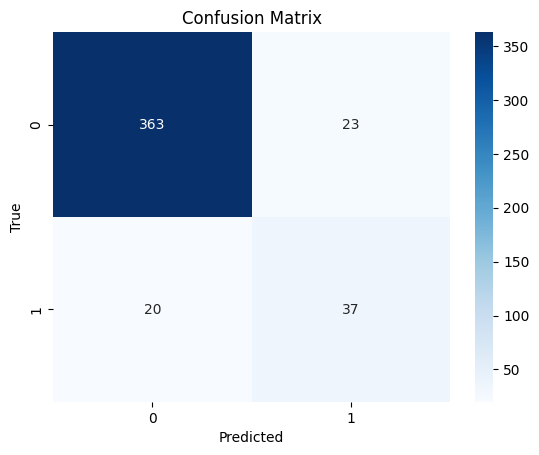

In [51]:
true_labels = y_test
predicted_labels = predictions

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

print('Precision:', precision)
print('Recall:', recall)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
labels = np.unique(true_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
train_set

,YEAR,MONTH,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.DURATION(mins),DEMAND.LOSS.MW(Megawatt),CUSTOMERS.AFFECTED,...,PC.REALGSP.STATE(USD),PC.REALGSP.USA(USD),PC.REALGSP.REL(fraction),PC.REALGSP.CHANGE(%),UTIL.REALGSP(USD),TOTAL.REALGSP(USD),UTIL.CONTRI(%),PI.UTIL.OFUSA(%),POPULATION,ANOMALY.LEVEL
0,2011,7.0,MRO,0,normal,severe weather,NaN,3060.0000,NaN,70000.0,...,51268.0,47586.0,1.077376,1.6,4802.0,274182.0,1.751391,2.2,5348119.0,-0.3
2,2010,10.0,MRO,0,cold,severe weather,heavy wind,3000.0000,NaN,70000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.5
3,2012,6.0,MRO,0,normal,severe weather,thunderstorm,2550.0000,NaN,68200.0,...,51598.0,48156.0,1.071476,0.6,5364.0,277627.0,1.932089,2.2,5380443.0,-0.1
5,2010,11.0,MRO,0,cold,severe weather,winter storm,1860.0000,NaN,60000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-1.4
6,2010,7.0,MRO,0,cold,severe weather,tornadoes,2970.0000,NaN,63000.0,...,50447.0,47287.0,1.066826,2.7,4571.0,267895.0,1.706266,2.1,5310903.0,-0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,MRO,0,cold,public appeal,NaN,720.0000,155.0,34500.0,...,57012.0,47586.0,1.198083,9.8,934.0,39067.0,2.390765,0.5,685326.0,-0.9
1530,2006,NaN,MRO,0,NaN,fuel supply emergency,Coal,696.5625,1650.0,NaN,...,42913.0,48909.0,0.877405,3.5,1019.0,27868.0,3.656524,0.7,649422.0,NaN
1531,2009,8.0,RFC,0,warm,islanding,NaN,59.0000,84.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5
1532,2009,8.0,MRO,0,warm,islanding,NaN,181.0000,373.0,NaN,...,45230.0,46680.0,0.968937,0.0,606.0,36504.0,1.660092,0.3,807067.0,0.5


## Final Model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

train_set['PC.REALGSP.STATE(USD)'] = train_set['PC.REALGSP.STATE(USD)'].fillna(train_set['PC.REALGSP.STATE(USD)'].mean())
train_set['OUTAGE.DURATION(mins)'] = train_set['OUTAGE.DURATION(mins)'].fillna(train_set['OUTAGE.DURATION(mins)'].mean())
reduced_list = ['CLIMATE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'CAUSE.CATEGORY', 'CLIMATE.REGION', 'PC.REALGSP.STATE(USD)','OUTAGE.DURATION(mins)','PI.UTIL.OFUSA(%)']
train_set_reduced = train_set[reduced_list]
transformers = ColumnTransformer([
            ('climate_transformed', OneHotEncoder(handle_unknown = 'ignore'), ['CLIMATE.CATEGORY']),
            ('d_climate_transformed', OneHotEncoder(handle_unknown = 'ignore'), ['CAUSE.CATEGORY.DETAIL']),
            ('Duration_transformed', OneHotEncoder(handle_unknown = 'ignore'), ['CAUSE.CATEGORY']),
            ('StandardScaler', StandardScaler(),['PC.REALGSP.STATE(USD)']),
            ('StandardScaler2', StandardScaler(),['OUTAGE.DURATION(mins)']),
            ('StandardScaler3', StandardScaler(),['PI.UTIL.OFUSA(%)'])
        ], remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(train_set_reduced.drop('CLIMATE.REGION', axis=1), train_set_reduced['CLIMATE.REGION'], test_size=0.25)
pipeline = Pipeline([
                    ('transformed_data', transformers),
                    ('rft', RandomForestClassifier())
                ])
pipeline.fit(X_train, y_train)
predition = pipeline.predict(X_test)
prediction_score_r = r2_score(y_test, predition)

ac = pipeline.score(X_test, y_test)
print('test_score', ac, 'r squared',prediction_score_r)
test_set['PC.REALGSP.STATE(USD)'] = test_set['PC.REALGSP.STATE(USD)'].fillna(test_set['PC.REALGSP.STATE(USD)'].mean())
test_set['OUTAGE.DURATION(mins)'] = test_set['OUTAGE.DURATION(mins)'].fillna(test_set['OUTAGE.DURATION(mins)'].mean())
test_set_reduced = test_set[reduced_list]
print('after 2013 testing: ', pipeline.score(test_set_reduced.drop('CLIMATE.REGION', axis=1), test_set_reduced['CLIMATE.REGION']))

test_score 0.9926739926739927 r squared 0.9251028806584363
after 2013 testing:  0.9345372460496614


/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_54672/4261176380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['PC.REALGSP.STATE(USD)'] = train_set['PC.REALGSP.STATE(USD)'].fillna(train_set['PC.REALGSP.STATE(USD)'].mean())
/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_54672/4261176380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['OUTAGE.DURATION(mins)'] = train_set['OUTAGE.DURATION(mins)'].fillna(train_set['OUTAGE.DURATION(mins)'].mean())


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'rft__n_estimators': [50, 75, 100, 125, 150, 200, 250, 300],
    'rft__max_features': [1, 3, 5, 7, 9, 12, 15, 18, 20],
    'rft__min_samples_split': [2, 5, 8, 10, 12, 15]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformed_data',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('climate_transformed',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['CLIMATE.CATEGORY']),
                                                                        ('d_climate_transformed',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['CAUSE.CATEGORY.DETAIL']),
                                                                        ('Duration_transformed',
                                                                         OneHotEncoder(handle_unknown='i...
                

In [55]:

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Through the GridSearchCV, the hyperparameters we will choose is: ', best_params)

Through the GridSearchCV, the hyperparameters we will choose is:  {'rft__max_features': 20, 'rft__min_samples_split': 2, 'rft__n_estimators': 100}


## Hyperparameter in the model
Through the GridSearchCV, the hyperparameters we will choose is:  {'rft__max_features': 9, 'rft__min_samples_split': 2, 'rft__n_estimators': 250}

In [56]:
pipeline = Pipeline([
                    ('transformed_data', transformers),
                    ('rft', RandomForestClassifier(max_features=9, min_samples_split=2, n_estimators=250, random_state=42))
                ])
pipeline.fit(X_train, y_train)
predition = pipeline.predict(X_test)
prediction_score_r = r2_score(y_test, predition)
ac = pipeline.score(X_test, y_test)
print('test_score_after_tunning', ac, 'r squared_after_tunning',prediction_score_r)
test_set['PC.REALGSP.STATE(USD)'] = test_set['PC.REALGSP.STATE(USD)'].fillna(test_set['PC.REALGSP.STATE(USD)'].mean())
test_set['OUTAGE.DURATION(mins)'] = test_set['OUTAGE.DURATION(mins)'].fillna(test_set['OUTAGE.DURATION(mins)'].mean())
test_set_reduced = test_set[reduced_list]
print('after tunning, 2013 testing result: ', pipeline.score(test_set_reduced.drop('CLIMATE.REGION', axis=1), test_set_reduced['CLIMATE.REGION']))

test_score_after_tunning 0.9926739926739927 r squared_after_tunning 0.9251028806584363
after tunning, 2013 testing result:  0.9322799097065463


Precision: 0.6666666666666666
Recall: 0.9473684210526315


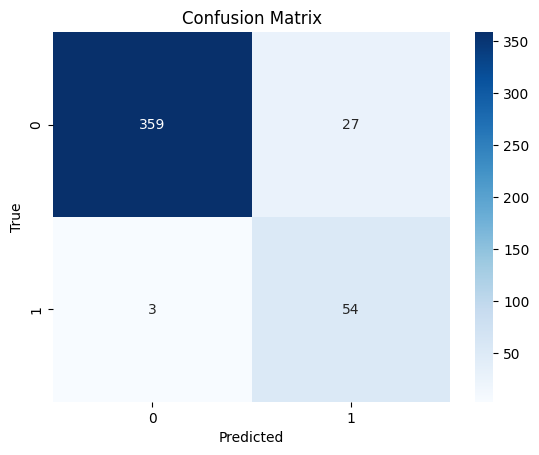

In [57]:
prediction = pipeline.predict(test_set_reduced.drop('CLIMATE.REGION', axis=1))
true_labels = test_set_reduced['CLIMATE.REGION']
predicted_labels = prediction

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

print('Precision:', precision)
print('Recall:', recall)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
labels = np.unique(true_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Fairness Analysis

In [58]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
data_base = df.copy()
data_base = data_base[data_base['YEAR'] > 2012]
binarizer = Binarizer(threshold=50000)
data_base['CUSTOMERS.AFFECTED'] = data_base['CUSTOMERS.AFFECTED'].fillna(data_base['CUSTOMERS.AFFECTED'].mean())
data_base['affected_people_classifier'] = binarizer.transform(data_base[['CUSTOMERS.AFFECTED']])
data_base0 = data_base[data_base['affected_people_classifier']==0]
data_base1 = data_base[data_base['affected_people_classifier']==1]
Accurace_0 = pipeline.predict(data_base0[reduced_list].drop('CLIMATE.REGION', axis=1))
Accurace_1 = pipeline.predict(data_base1[reduced_list].drop('CLIMATE.REGION', axis=1))
Accuracy_0 = accuracy_score(data_base0['CLIMATE.REGION'], Accurace_0)
Accuracy_1 = accuracy_score(data_base1['CLIMATE.REGION'], Accurace_1)
print("Accuracy0:", Accuracy_0)
print("Accuracy1:", Accuracy_1)
print('observed difference in Accuracy: ', Accuracy_0-Accuracy_1)



Accuracy0: 0.9519230769230769
Accuracy1: 0.9262536873156342
observed difference in Accuracy:  0.025669389607442694


/Users/kevinmbp/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


In [59]:
def permutaion_test(df, times):
    data_base = df.copy()
    data_base = data_base[data_base['YEAR'] > 2012]
    binarizer = Binarizer(threshold=50000)
    data_base['CUSTOMERS.AFFECTED'] = data_base['CUSTOMERS.AFFECTED'].fillna(data_base['CUSTOMERS.AFFECTED'].mean())
    data_base['affected_people_classifier'] = binarizer.transform(data_base[['CUSTOMERS.AFFECTED']])
    Accuracy_result_list = []
    for i in range(times):
        data_base['affected_people_classifier'] = np.random.permutation(data_base['affected_people_classifier'])
        data_base0 = data_base[data_base['affected_people_classifier']==0]
        data_base1 = data_base[data_base['affected_people_classifier']==1]
        Accurace_0 = pipeline.predict(data_base0[reduced_list].drop('CLIMATE.REGION', axis=1))
        Accurace_1 = pipeline.predict(data_base1[reduced_list].drop('CLIMATE.REGION', axis=1))
        Accuracy_0 = accuracy_score(data_base0['CLIMATE.REGION'], Accurace_0)
        Accuracy_1 = accuracy_score(data_base1['CLIMATE.REGION'], Accurace_1)
        Accuracy_result = Accuracy_0-Accuracy_1
        Accuracy_result_list.append(Accuracy_result)
    return Accuracy_result_list
    
graph1 = permutaion_test(df, 5000)


/Users/kevinmbp/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


In [60]:
data_frame_1 = pd.DataFrame(graph1)
data_frame_1.columns = ['Permutation test result for Accuracy']
fig = px.histogram(data_frame_1, x='Permutation test result for Accuracy', nbins=15, histnorm='probability', 
                   title='Difference of the ')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(Accuracy_0-Accuracy_1, 2)}</span>',
                   x=1.15 * (Accuracy_0-Accuracy_1), showarrow=False, y=0.055)
fig.add_vline(x=Accuracy_0-Accuracy_1, line_color='red')
p_value = (np.array(graph1) > (Accuracy_0-Accuracy_1)).mean()
print(p_value)
fig


0.1286


In [64]:
fig.write_html('fiarness1.html', include_plotlyjs='cdn')

In [61]:
data_base = df.copy()
data_base = data_base[data_base['YEAR'] > 2012]
binarizer = Binarizer(threshold=50000)
data_base['CUSTOMERS.AFFECTED'] = data_base['CUSTOMERS.AFFECTED'].fillna(data_base['CUSTOMERS.AFFECTED'].mean())
data_base['affected_people_classifier'] = binarizer.transform(data_base[['CUSTOMERS.AFFECTED']])
data_base0 = data_base[data_base['affected_people_classifier']==0]
data_base1 = data_base[data_base['affected_people_classifier']==1]
Accurace_0 = pipeline.predict(data_base0[reduced_list].drop('CLIMATE.REGION', axis=1))
Accurace_1 = pipeline.predict(data_base1[reduced_list].drop('CLIMATE.REGION', axis=1))
r_squared_0 = r2_score(data_base0['CLIMATE.REGION'], Accurace_0)
r_squared_1 = r2_score(data_base1['CLIMATE.REGION'], Accurace_1)
observed_diffrece_r_squared = r_squared_0 -r_squared_1
print("r_squared_0:", r_squared_0)
print("r_squared_1:", r_squared_1)
print('observed difference in r_squared: ', observed_diffrece_r_squared)


r_squared_0: 0.7291666666666666
r_squared_1: 0.16072489601901352
observed difference in r_squared:  0.5684417706476531


/Users/kevinmbp/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning:

X has feature names, but Binarizer was fitted without feature names



In [62]:
def permutaion_test_2(df, times):
    data_base = df.copy()
    data_base = data_base[data_base['YEAR'] > 2012]
    binarizer = Binarizer(threshold=50000)
    data_base['CUSTOMERS.AFFECTED'] = data_base['CUSTOMERS.AFFECTED'].fillna(data_base['CUSTOMERS.AFFECTED'].mean())
    data_base['affected_people_classifier'] = binarizer.transform(data_base[['CUSTOMERS.AFFECTED']])
    r_squared_list = []
    for i in range(times):
        data_base['affected_people_classifier'] = np.random.permutation(data_base['affected_people_classifier'])
        data_base0 = data_base[data_base['affected_people_classifier']==0]
        data_base1 = data_base[data_base['affected_people_classifier']==1]
        Accurace_0 = pipeline.predict(data_base0[reduced_list].drop('CLIMATE.REGION', axis=1))
        Accurace_1 = pipeline.predict(data_base1[reduced_list].drop('CLIMATE.REGION', axis=1))
        r_squared_0 = r2_score(data_base0['CLIMATE.REGION'], Accurace_0)
        r_squared_1 = r2_score(data_base1['CLIMATE.REGION'], Accurace_1)
        observed_diffrece_r_squared = r_squared_0 -r_squared_1
        r_squared_list.append(observed_diffrece_r_squared)
    return r_squared_list
    
graph2 = permutaion_test_2(df, 5000)

/Users/kevinmbp/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning:

X has feature names, but Binarizer was fitted without feature names



In [63]:
data_frame_2 = pd.DataFrame(graph2)
data_frame_2.columns = ['Permutation test result for r squared']
fig2 = px.histogram(data_frame_2, x='Permutation test result for r squared', nbins=15, histnorm='probability', 
                   title='Difference of the ')
fig2.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_diffrece_r_squared, 2)}</span>',
                   x=1.15 * (Accuracy_0-Accuracy_1), showarrow=False, y=0.055)
fig2.add_vline(x=observed_diffrece_r_squared, line_color='red')
p_value2 = (np.array(graph2) > (observed_diffrece_r_squared)).mean()
print(p_value2)
fig2


0.0112


In [65]:
fig2.write_html('fairness2.html', include_plotlyjs='cdn')